In [2]:
#all plotly
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
#others
import pandas as pd
import numpy as np

In [3]:
import plotly.express as px

In [21]:
file = 'Wine.xlsx'
xl = pd.ExcelFile(file)
df = xl.parse('Sheet1')
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Start Date,2000-03-24 00:00:00
2,NaN,End Date,NaN
3,NaN,NaN,NaN
4,NaN,NaN,LIVX100 Index
5,NaN,NaN,Last Price
6,NaN,Dates,PX_LAST
7,NaN,2020-02-29 00:00:00,302.56
8,NaN,2020-01-31 00:00:00,301.88
9,NaN,2019-12-31 00:00:00,302.56


In [22]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [23]:
df.head(10)

,Unnamed: 1,Unnamed: 2
0,NaN,NaN
1,Start Date,2000-03-24 00:00:00
2,End Date,NaN
3,NaN,NaN
4,NaN,LIVX100 Index
5,NaN,Last Price
6,Dates,PX_LAST
7,2020-02-29 00:00:00,302.56
8,2020-01-31 00:00:00,301.88
9,2019-12-31 00:00:00,302.56


In [24]:
df = df.iloc[7:]

In [25]:
df.head(10)

,Unnamed: 1,Unnamed: 2
7,2020-02-29 00:00:00,302.56
8,2020-01-31 00:00:00,301.88
9,2019-12-31 00:00:00,302.56
10,2019-11-30 00:00:00,304.42
11,2019-10-31 00:00:00,308.37
12,2019-09-30 00:00:00,311.35
13,2019-08-31 00:00:00,312.37
14,2019-07-31 00:00:00,310.07
15,2019-06-30 00:00:00,309.22
16,2019-05-31 00:00:00,308.01


In [33]:
df.tail()

,date,livex100
226,2001-11-30,94.77
227,2001-10-31,94.538
228,2001-09-30,94.275
229,2001-08-31,94.715
230,2001-07-31,93.491


In [26]:
df.columns = ['date', 'livex100']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 7 to 230
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      224 non-null    object
 1   livex100  224 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [30]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 7 to 230
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      224 non-null    datetime64[ns]
 1   livex100  224 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.6+ KB


In [65]:
import yfinance as yf
tickers_list = ['^GSPC']
data1 = yf.download(tickers_list)['Close']
data1.head()

[*********************100%***********************]  1 of 1 completed


Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
Name: Close, dtype: float64

In [66]:
data1 = pd.DataFrame(data1)

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23201 entries, 1927-12-30 to 2020-05-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   23201 non-null  float64
dtypes: float64(1)
memory usage: 362.5 KB


In [68]:
data1.head()

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [76]:
data2 = data1.query('Date >= "06/30/2001"')

In [77]:
data2.head()

,Close
Date,
2001-07-02,1236.719971
2001-07-03,1234.449951
2001-07-05,1219.239990
2001-07-06,1190.589966
2001-07-09,1198.780029


In [78]:
data3 = data2.resample('1M').mean()

In [79]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2001-07-31 to 2020-05-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   227 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [80]:
data3.head()

,Close
Date,
2001-07-31,1204.449521
2001-08-31,1178.503927
2001-09-30,1044.643994
2001-10-31,1076.590438
2001-11-30,1129.683332


In [90]:
df.head()

,livex100
date,
2001-07-31,93.491
2001-08-31,94.715
2001-09-30,94.275
2001-10-31,94.538
2001-11-30,94.77


In [87]:
df = df.set_index('date')

In [89]:
df.sort_index(inplace = True)

In [81]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2001-07-31 to 2020-05-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   227 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [91]:
total = data3.merge(df, left_index = True, right_index = True)

In [92]:
total.head()

,Close,livex100
2001-07-31,1204.449521,93.491
2001-08-31,1178.503927,94.715
2001-09-30,1044.643994,94.275
2001-10-31,1076.590438,94.538
2001-11-30,1129.683332,94.77


In [93]:
total.columns = ['spx', 'livex100']

In [98]:
data_a = ((total.pct_change()+1).cumprod())
data_a.fillna(1, inplace = True)

In [100]:
x = data_a.index

In [102]:
spx = (data_a['spx'] ) * 100
livex100 = (data_a['livex100']) * 100

In [103]:
data_a.columns

Index(['spx', 'livex100'], dtype='object')

In [110]:
columns = data_a.columns[:1]
labs = columns.tolist()

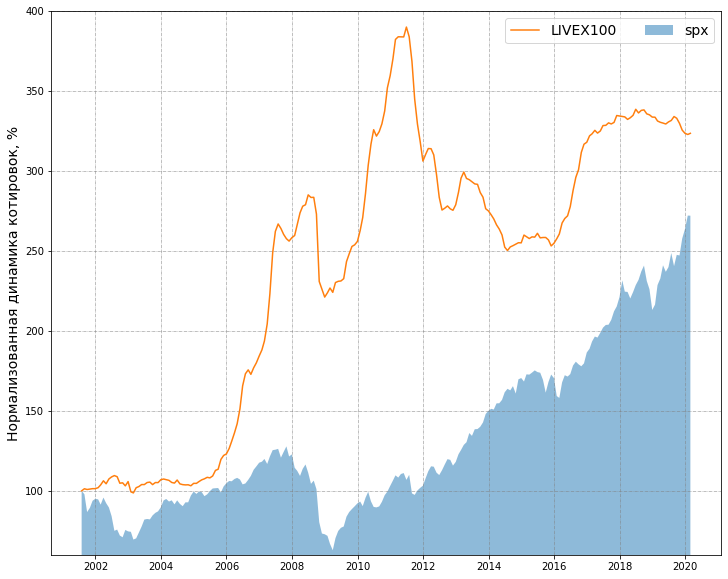

In [111]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 10))

ax.stackplot(x, spx, labels = labs, alpha = 0.5)
ax.plot(livex100, label = 'LIVEX100')

ax.set(ylim=[60, 400])
ax.legend(fontsize=14, ncol=2)
plt.ylabel('Нормализованная динамика котировок, %', fontsize = 14)

plt.grid(which = 'major', color = 'grey', linestyle = '-.', linewidth = 0.5)

plt.show()

In [115]:
fig = px.line(data_a, x = x, y = 'livex100')
fig1 = px.line(data_a, x = x, y = 'spx')
fig1.show()
fig.show()

In [122]:
fig = go.Figure()

In [123]:
fig.add_trace(go.Scatter(x=x, y=spx,
                    mode='lines',
                    name='S&P 500'))
fig.add_trace(go.Scatter(x=x, y=livex100,
                    mode='lines',
                    name='LIVEX100'))


fig.show()

In [124]:
import plotly.io as pio
pio.write_html(fig, file = 'wine.html', auto_open = True)